In [23]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import shap
import numpy as np

In [24]:
batch_size = 128
num_classes = 10
epochs = 12
img_rows, img_cols = 28, 28

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [6]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [7]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


In [8]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))


In [9]:

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [10]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 44s 731us/step - loss: 0.2616 - acc: 0.9198 - val_loss: 0.0668 - val_acc: 0.9795
Epoch 2/12
60000/60000 [==============================] - 34s 572us/step - loss: 0.0886 - acc: 0.9740 - val_loss: 0.0445 - val_acc: 0.9852
Epoch 3/12
60000/60000 [==============================] - 35s 576us/step - loss: 0.0657 - acc: 0.9803 - val_loss: 0.0360 - val_acc: 0.9881
Epoch 4/12
60000/60000 [==============================] - 35s 579us/step - loss: 0.0550 - acc: 0.9836 - val_loss: 0.0388 - val_acc: 0.9876
Epoch 5/12
60000/60000 [==============================] - 35s 578us/step - loss: 0.0466 - acc: 0.9862 - val_loss: 0.0319 - val_acc: 0.9895
Epoch 6/12
60000/60000 [==============================] - 34s 574us/step - loss: 0.0427 - acc: 0.9874 - val_loss: 0.0315 - val_acc: 0.9887
Epoch 7/12
60000/60000 [==============================] - 34s 575us/step - loss: 0.0374 - acc: 0.9888 - val_loss: 0.

In [17]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.028416768817815227
Test accuracy: 0.9915


In [25]:
background = x_train[np.random.choice(x_train.shape[0], 100, replace=False)]
e = shap.DeepExplainer(model, background)
shap_values = e.shap_values(x_test[1:5])

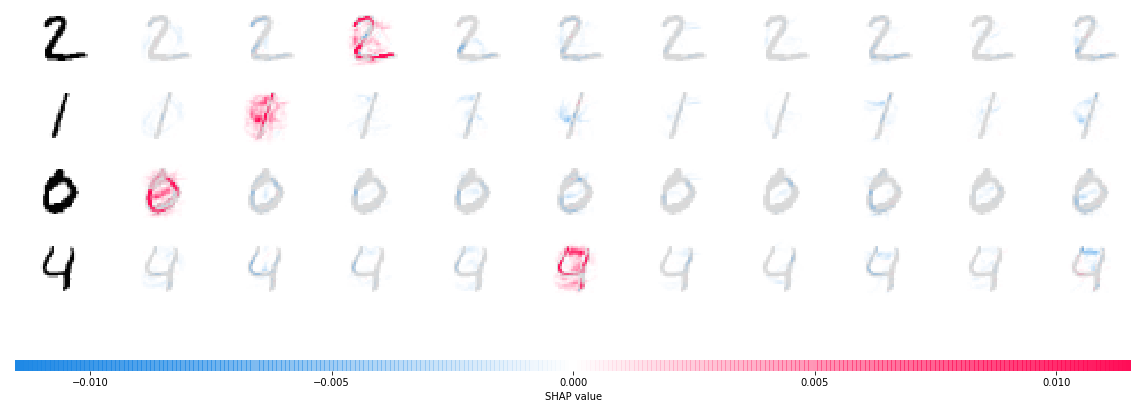

In [26]:
shap.image_plot(shap_values, -x_test[1:5])